In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
from sklearn import datasets, cross_validation, tree, ensemble, grid_search

import numpy as np
import pandas as pd

In [36]:
(X, y) = datasets.load_digits(return_X_y=True)
print X.shape
print int(round(np.sqrt(X.shape[1]), 0))

(1797, 64)
8


In [72]:
clf = tree.DecisionTreeClassifier()
score_1 = cross_validation.cross_val_score(clf, X, y, cv=10, n_jobs=-1).mean()
print score_1

0.826385672691601


In [44]:
bg_clf = ensemble.BaggingClassifier(clf, n_estimators=100)
score_2 = cross_validation.cross_val_score(bg_clf, X, y, cv=10, n_jobs=-1).mean()
print score_2

0.9266438334403542


In [43]:
bg_clf_adjusted = ensemble.BaggingClassifier(clf, n_estimators=100, max_features=int(round(np.sqrt(X.shape[1]), 0)))
score_3 = cross_validation.cross_val_score(bg_clf_adjusted, X, y, cv=10, n_jobs=-1).mean()
print score_3

0.9260160315304409


In [41]:
clf_adjusted = tree.DecisionTreeClassifier(max_features='sqrt')
bg_clf_adjusted_v2 = ensemble.BaggingClassifier(clf_adjusted, n_estimators=100)
score_4 = cross_validation.cross_val_score(bg_clf_adjusted_v2, X, y, cv=10, n_jobs=-1).mean()
print score_4

0.9532755987970665


In [45]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=100)
score_rf = cross_validation.cross_val_score(rf_classifier, X, y, cv=10, n_jobs=-1).mean()
print score_rf

0.9505852421544272


In [46]:
rf_classifier.get_params().keys()

['warm_start',
 'oob_score',
 'n_jobs',
 'min_impurity_decrease',
 'verbose',
 'max_leaf_nodes',
 'bootstrap',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'max_depth',
 'class_weight']

In [47]:
n_trees_grid = {'n_estimators': np.arange(5, 106, 10)}
features_grid = {'max_features': np.arange(0.1, 1.01, 0.1)}
depth_grid = {'max_depth': np.arange(2, 20, 2)}

In [57]:
grid_cv_trees = grid_search.GridSearchCV(rf_classifier, n_trees_grid, cv = 10)
grid_cv_trees.fit(X, y)
print grid_cv_trees.grid_scores_

[mean: 0.87368, std: 0.05789, params: {'n_estimators': 5}, mean: 0.93434, std: 0.02554, params: {'n_estimators': 15}, mean: 0.94825, std: 0.01634, params: {'n_estimators': 25}, mean: 0.94602, std: 0.02252, params: {'n_estimators': 35}, mean: 0.94769, std: 0.02346, params: {'n_estimators': 45}, mean: 0.95326, std: 0.02178, params: {'n_estimators': 55}, mean: 0.95326, std: 0.02282, params: {'n_estimators': 65}, mean: 0.94880, std: 0.02462, params: {'n_estimators': 75}, mean: 0.94769, std: 0.02341, params: {'n_estimators': 85}, mean: 0.95159, std: 0.02209, params: {'n_estimators': 95}, mean: 0.95437, std: 0.01934, params: {'n_estimators': 105}]


In [58]:
df = pd.DataFrame(grid_cv_trees.grid_scores_)
df.head()

,parameters,mean_validation_score,cv_validation_scores
0,{u'n_estimators': 5},0.873678,"[0.8324324324324325, 0.907103825136612, 0.7845..."
1,{u'n_estimators': 15},0.934335,"[0.8810810810810811, 0.9398907103825137, 0.917..."
2,{u'n_estimators': 25},0.948247,"[0.9081081081081082, 0.9562841530054644, 0.950..."
3,{u'n_estimators': 35},0.946021,"[0.9135135135135135, 0.9672131147540983, 0.933..."
4,{u'n_estimators': 45},0.947691,"[0.9081081081081082, 0.9617486338797814, 0.928..."


In [63]:
def plot_from_df(df, name):
    params = [x[name] for x in df.parameters]
    scores = [x for x in df.mean_validation_score]
    pylab.grid(True)
    pylab.plot(params, scores, 'r-', marker='o')
    pylab.ylim((0.6, 1.05))
    pylab.xlabel(name)
    pylab.ylabel('accuracy')

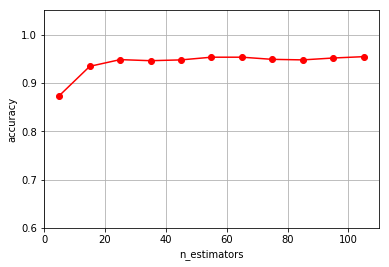

In [67]:
plot_from_df(df, u'n_estimators')

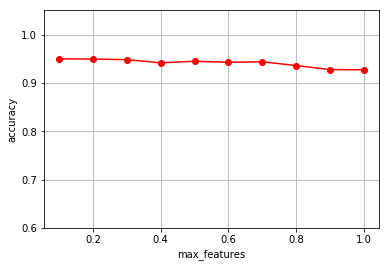

In [68]:
grid_cv_features = grid_search.GridSearchCV(rf_classifier, features_grid, cv = 10)
grid_cv_features.fit(X, y)
df = pd.DataFrame(grid_cv_features.grid_scores_)
plot_from_df(df, features_grid.keys()[0])

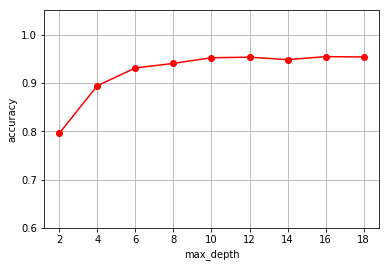

In [69]:
grid_cv_depth = grid_search.GridSearchCV(rf_classifier, depth_grid, cv = 10)
grid_cv_depth.fit(X, y)
df = pd.DataFrame(grid_cv_depth.grid_scores_)
plot_from_df(df, depth_grid.keys()[0])

In [70]:
def write_answer(answer, i):
    with open("answer" + str(i) + ".txt", "w") as fout:
        fout.write(str(answer))

In [73]:
write_answer(score_1, 1)
write_answer(score_2, 2)
write_answer(score_3, 3)
write_answer(score_4, 4)

In [74]:
answer_5 = '2 3 4 7'
write_answer(answer_5, 5)